In [2]:
from pathlib import Path
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [25]:
csv_file_path = Path("assets/pds.csv")
df_covid = pd.read_csv(csv_file_path)

# Convert the Index 'Date of Death' to datetime
df_covid['DATE_OF_DEATH'] = pd.to_datetime(df_covid['DATE_OF_DEATH']).dt.date


# Convert Age and Total Morbidities to Integer
df_covid['AGE'] = pd.to_numeric(df_covid['AGE'], errors='coerce').astype('Int64')
df_covid['TOTAL_MORBIDITIES'] = pd.to_numeric(df_covid['TOTAL_MORBIDITIES'], errors='coerce').astype('Int64')

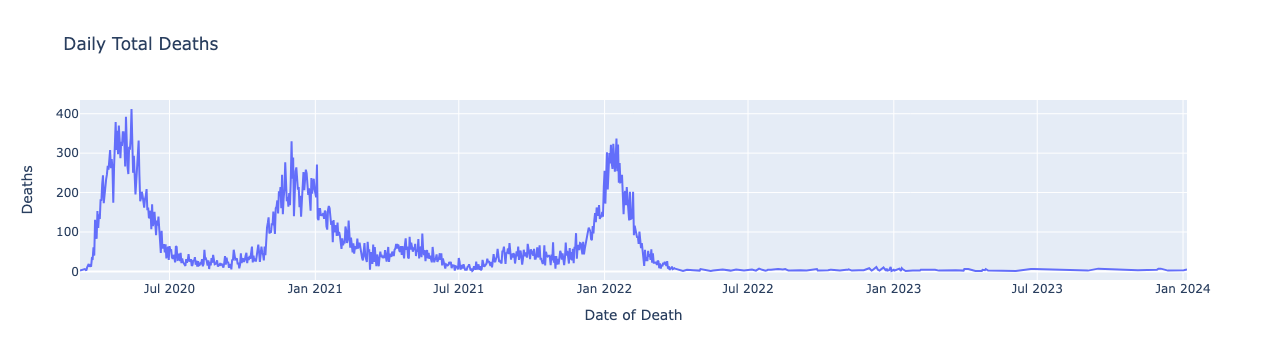

[datetime.date(2020, 4, 3) datetime.date(2020, 4, 5)
 datetime.date(2020, 4, 2) datetime.date(2020, 4, 7)
 datetime.date(2020, 4, 11) datetime.date(2020, 4, 12)
 datetime.date(2020, 4, 13) datetime.date(2020, 4, 14)
 datetime.date(2020, 4, 24) datetime.date(2020, 4, 25)
 datetime.date(2020, 4, 26) datetime.date(2020, 5, 1)
 datetime.date(2020, 5, 2) datetime.date(2020, 5, 4)
 datetime.date(2020, 5, 5) datetime.date(2020, 5, 6)
 datetime.date(2020, 5, 8) datetime.date(2020, 5, 11)
 datetime.date(2020, 5, 10) datetime.date(2020, 5, 9)
 datetime.date(2020, 5, 14) datetime.date(2020, 5, 16)
 datetime.date(2020, 5, 7) datetime.date(2020, 5, 22)
 datetime.date(2020, 5, 26) datetime.date(2020, 5, 28)
 datetime.date(2020, 5, 30) datetime.date(2020, 5, 25)
 datetime.date(2020, 5, 31) datetime.date(2020, 6, 6)
 datetime.date(2020, 6, 7) datetime.date(2020, 6, 9)
 datetime.date(2020, 6, 12) datetime.date(2020, 6, 26)
 datetime.date(2020, 7, 1) datetime.date(2020, 7, 11)
 datetime.date(2020, 7, 17

In [31]:
df_covid_trend_filtered = df_covid
df_covid_trend_daily = df_covid.groupby(df_covid_trend_filtered['DATE_OF_DEATH']).count().reset_index()

figure=px.line(df_covid_trend_daily,
               x='DATE_OF_DEATH',
               y='CASE_NUMBER',
               labels={'DATE_OF_DEATH': 'Date of Death', 'CASE_NUMBER': 'Deaths'},
               title="Daily Total Deaths")
figure.show()
print(df_covid_trend_filtered['DATE_OF_DEATH'].unique())

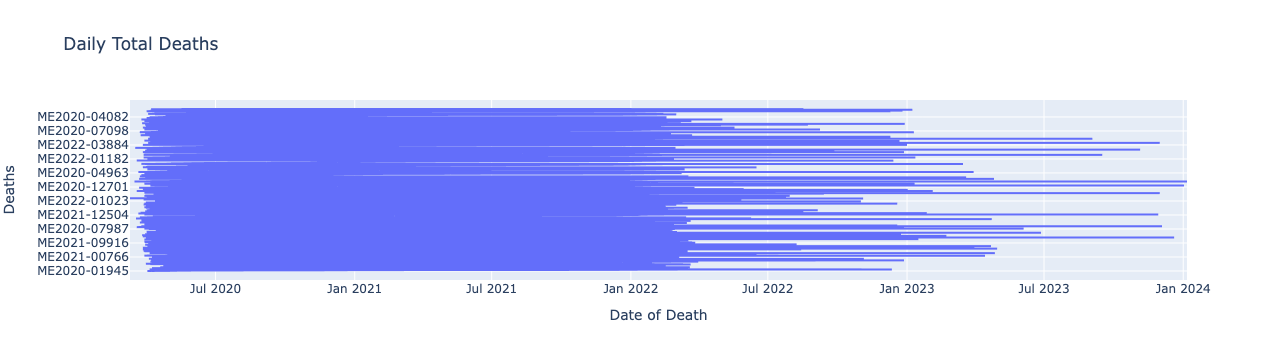

In [17]:


figure=px.line(df_covid,
               x='DATE_OF_DEATH',
               y='CASE_NUMBER',
               labels={'DATE_OF_DEATH': 'Date of Death', 'CASE_NUMBER': 'Deaths'},
               title="Daily Total Deaths")
figure.show()